# 안녕하세요^^ 
# AIVLE 미니 프로젝트에 오신 여러분을 환영합니다.
* 본 과정에서는 실제 사례와 데이터를 기반으로 문제를 해결하는 전체 과정을 자기 주도형 실습으로 진행해볼 예정입니다.
* 앞선 교육과정을 정리하는 마음과 지금까지 배운 내용을 바탕으로 문제 해결을 해볼게요!
* 미니 프로젝트를 통한 문제 해결 과정 'A에서 Z까지', 지금부터 시작합니다!

---

# (실습준비) 데이터 불러오기부터

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import joblib

# 필요하다고 판단되는 라이브러리를 추가하세요.
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score as recall


In [4]:
# !pip install shap

In [5]:
# 학습/평가 데이터 로딩
train_x = pd.read_csv('train_x.csv')
train_y = pd.read_csv('train_y.csv')
test_x = pd.read_csv('test_x.csv')
test_y = pd.read_csv('test_y.csv')

In [6]:
train_x = train_x.drop('기준일ID', axis=1)

In [7]:
test_x = test_x.drop('기준일ID', axis=1)

In [8]:
train_x['출퇴근시간대'] = train_x['출퇴근시간대'].apply(lambda x: 1 if x == '출퇴근시간' else 0)

In [9]:
train_x['출퇴근시간대']

0        0
1        0
2        0
3        0
4        0
        ..
43531    1
43532    1
43533    1
43534    0
43535    0
Name: 출퇴근시간대, Length: 43536, dtype: int64

In [10]:
test_x['출퇴근시간대'] = test_x['출퇴근시간대'].apply(lambda x: 1 if x == '출퇴근시간' else 0)

In [11]:
test_x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   hour          4344 non-null   int64  
 1   year          4344 non-null   int64  
 2   month         4344 non-null   int64  
 3   day           4344 non-null   int64  
 4   daily_avg     4344 non-null   float64
 5   3hour_avg     4344 non-null   float64
 6   1daybefore    4344 non-null   float64
 7   출퇴근시간대        4344 non-null   int64  
 8   Holiday_Name  4344 non-null   object 
dtypes: float64(3), int64(5), object(1)
memory usage: 305.6+ KB


In [12]:
train_x = train_x.drop('Holiday_Name', axis=1)
test_x = test_x.drop('Holiday_Name', axis=1)

---

# 1. Machine Learning
## 이제 모델링을 해봅시다!
+ KeyPoint : 머신러닝 라이브러리를 토대로 모델링을 할 수 있다.

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [15]:
# 아래에 실습코드를 작성하세요.

model_LR = LinearRegression()
model_LR.fit(train_x, train_y)
ypred_LR = model_LR.predict(test_x)

print('RMSE:', np.sqrt(mse(test_y, ypred_LR)))
print('MSE:', mse(test_y, ypred_LR))
print('R2:', r2_score(test_y, ypred_LR))

RMSE: 436.9044018968074
MSE: 190885.456396807
R2: 0.9848766483168254


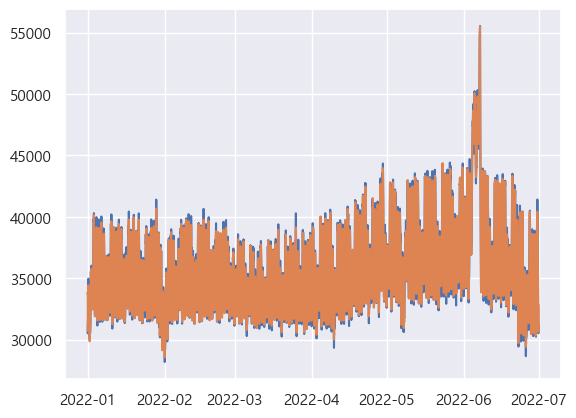

In [17]:
datetime = pd.to_datetime(test_x[['year', 'month', 'day', 'hour']])
plt.plot(datetime, test_y, label='real')
plt.plot(datetime, ypred_LR, label='expected')
plt.show()

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [25]:
# 아래에 실습코드를 작성하세요.

model_DT = DecisionTreeRegressor(max_depth=5, random_state=1)
model_DT.fit(train_x, train_y)
y_pred_DT = model_DT.predict(test_x)

print('RMSE:', np.sqrt(mse(test_y, y_pred_DT)))
print('MAE:', mae(test_y, y_pred_DT))
print('R2:', r2_score(test_y, y_pred_DT))

RMSE: 666.2134535717179
MAE: 498.11783865802175
R2: 0.9648356974456019


#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

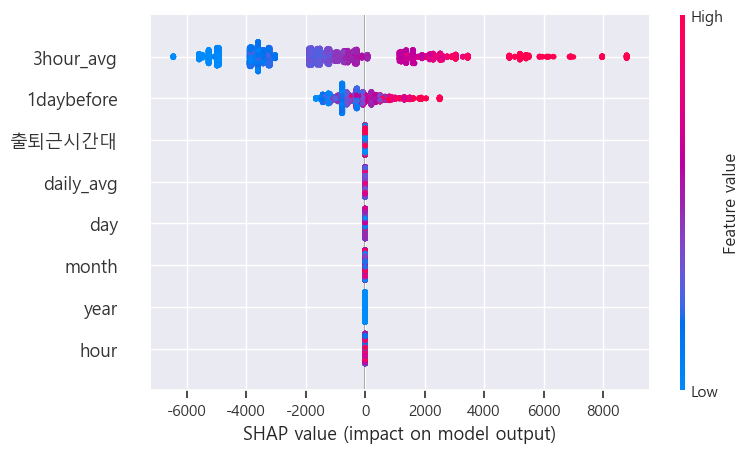

In [26]:
# Feature의 중요도 확인
import shap

explainer = shap.Explainer(model_DT)
shap_values = explainer(test_x)

# 특정 예측에 대한 SHAP summary plot
shap.summary_plot(shap_values, test_x)

In [27]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [29]:
# 아래에 실습코드를 작성하세요.

model_gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=5, random_state=1)
model_gb.fit(train_x, train_y)
y_pred_gb = model_gb.predict(test_x)

print('RMSE:', np.sqrt(mse(test_y, y_pred_gb)))
print('R2:', r2_score(test_y, y_pred_gb))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().


RMSE: 410.69455606037786
R2: 0.9866367189282887


#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [30]:
# 변수 중요도 plot
import numpy as np
def plot_feature_importance(importance, names, topn = 'all'):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_temp = pd.DataFrame(data)

    fi_temp.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_temp.reset_index(drop=True, inplace = True)

    if topn == 'all' :
        fi_df = fi_temp.copy()
    else :
        fi_df = fi_temp.iloc[:topn]

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('importance')
    plt.ylabel('feature names')
    plt.grid()

    return fi_df

In [31]:
# 아래에 실습코드를 작성하세요.
def plot_PFI(pfi, col_names):
    plt.figure(figsize = (14,5))
    plt.subplot(1,2,1)
    for i,vars in enumerate(col_names) :
        sns.kdeplot(pfi.importances[i], label = vars)
    plt.legend()
    plt.grid()

    sorted_idx = pfi.importances_mean.argsort()
    plt.subplot(1,2,2)
    plt.boxplot(pfi.importances[sorted_idx].T, vert=False, labels=col_names[sorted_idx])
    plt.axvline(0, color = 'r')
    plt.grid()
    plt.show()

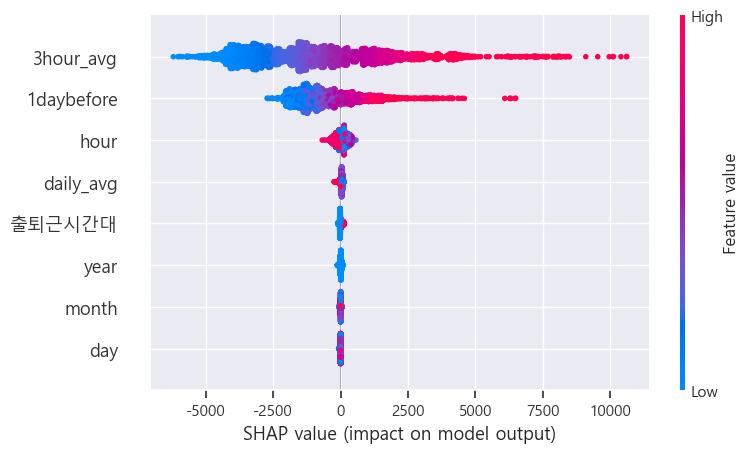

In [33]:
# Feature의 중요도 확인
"""
import pandas as pd
df = pd.DataFrame({'Features': train_x.columns, 'Importance': forest_model.feature_importances_})
df = df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Features', data=df)
plt.show()

from sklearn.inspection import permutation_importance
pfi = permutation_importance(forest_model, test_x, test_y, n_repeats=10, scoring = 'r2', random_state=2023)
plot_PFI(pfi, train_x.columns)
"""
import shap
explainer = shap.Explainer(model_gb)
shap_values = explainer(test_x)
# 특정 예측에 대한 SHAP summary plot
shap.summary_plot(shap_values, test_x)

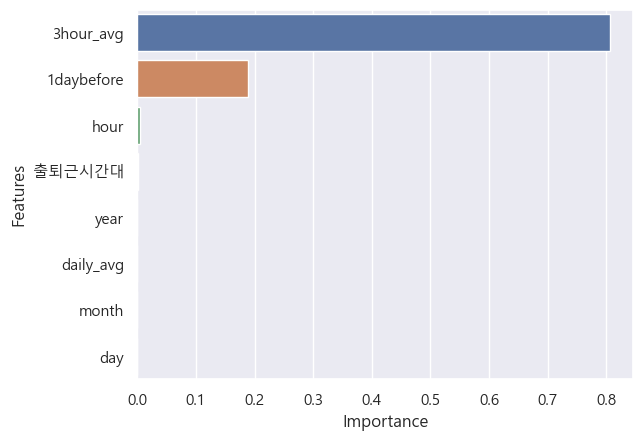

NameError: name 'forest_model' is not defined

In [34]:
# Feature의 중요도 확인
df = pd.DataFrame({'Features': train_x.columns, 'Importance': model_gb.feature_importances_})
df = df.sort_values(by='Importance', ascending=False)
sns.barplot(x='Importance', y='Features', data=df)
plt.show()

from sklearn.inspection import permutation_importance
pfi = permutation_importance(forest_model, test_x, test_y, n_repeats=10, scoring = 'r2', random_state=2023)
plot_PFI(pfi, train_x.columns)

import shap
explainer = shap.TreeExplainer(xgboost_model)
shap_values = explainer.shap_values(test_x)
shap.summary_plot(shap_values, test_x)

In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.




In [ ]:
# 아래에 실습코드를 작성하세요.



#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [ ]:
# Feature의 중요도 확인




In [ ]:
# 확인할 수 있는 인사이트
# 1.
# 2.
# 3.

#### [실습문제8] 스케일링
* Min Max Scale 함수를 활용하여 스케일링 후 위 모델에 적용하여 보세요. 


In [ ]:
# 아래에 실습코드를 작성하세요.

import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


In [ ]:
# 아래에 실습코드를 작성하세요.



---

# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝

* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [71]:
# 아래에 실습코드를 작성하세요.
# ! pip install tensorflow

In [72]:
# 아래에 실습코드를 작성하세요.

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Input(shape=(train_x.shape[1],)),  # 입력층
    layers.Dense(128, activation='relu'),  # 128개의 유닛과 ReLU 활성화 함수를 사용한 은닉층
    layers.Dense(64, activation='relu'),  # 64개의 유닛과 ReLU 활성화 함수를 사용한 은닉층
    layers.Dense(1)  # 10개의 유닛과 소프트맥스 활성화 함수를 사용한 출력층
])

In [73]:
# 모델 컴파일
model.compile(optimizer='adam',  # 옵티마이저: Adam
              loss='mean_squared_error')  # 손실 함수: 평균 제곱 오차 (MSE) - 회귀 모델


In [74]:
# 모델 학습
model.fit(train_x, train_y, epochs=10, batch_size=32)

Epoch 1/10
1361/1361 [==============================] - 2s 1ms/step - loss: 10126744.0000
Epoch 2/10
1361/1361 [==============================] - 2s 1ms/step - loss: 260055.7500
Epoch 3/10
1361/1361 [==============================] - 2s 2ms/step - loss: 273651.7500
Epoch 4/10
1361/1361 [==============================] - 2s 1ms/step - loss: 278493.0938
Epoch 5/10
1361/1361 [==============================] - 2s 1ms/step - loss: 283692.8750
Epoch 6/10
1361/1361 [==============================] - 2s 2ms/step - loss: 284366.6562
Epoch 7/10
1361/1361 [==============================] - 2s 1ms/step - loss: 290063.5625
Epoch 8/10
1361/1361 [==============================] - 2s 1ms/step - loss: 288779.8438
Epoch 9/10
1361/1361 [==============================] - 2s 1ms/step - loss: 283244.3750
Epoch 10/10
1361/1361 [==============================] - 2s 1ms/step - loss: 281224.0312


In [75]:
# 모델 평가
test_loss = model.evaluate(test_x, test_y)
print(f"Test Loss: {test_loss}")
y_pred = model.predict(test_x)
r_squared = r2_score(test_y, y_pred)
print(f"R-squared Score: {r_squared}")

136/136 [==============================] - 0s 1ms/step - loss: 200516.2031
Test Loss: 200516.203125
136/136 [==============================] - 0s 1ms/step
R-squared Score: 0.984113629296701
